     Imaterialist Fashion (2019) Case Study (DL self made case study)

Importing Libraries

In [1]:
import cv2
import os
import json
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
%matplotlib inline

import tensorflow as tf


In [2]:
import warnings
warnings.filterwarnings("ignore")

<b>1. Reading Files</b> 

In [3]:
with open(r'D:/fashion imaterialist case study/label_descriptions.json') as labels_json:
    labels_df = json.load(labels_json)

print(labels_df['attributes'])

[{'id': 0, 'name': 'above-the-hip (length)', 'supercategory': 'length', 'level': 1}, {'id': 1, 'name': 'hip (length)', 'supercategory': 'length', 'level': 1}, {'id': 2, 'name': 'micro (length)', 'supercategory': 'length', 'level': 1}, {'id': 3, 'name': 'mini (length)', 'supercategory': 'length', 'level': 1}, {'id': 4, 'name': 'above-the-knee (length)', 'supercategory': 'length', 'level': 1}, {'id': 5, 'name': 'knee (length)', 'supercategory': 'length', 'level': 1}, {'id': 6, 'name': 'below the knee (length)', 'supercategory': 'length', 'level': 1}, {'id': 7, 'name': 'midi', 'supercategory': 'length', 'level': 1}, {'id': 8, 'name': 'maxi (length)', 'supercategory': 'length', 'level': 1}, {'id': 9, 'name': 'floor (length)', 'supercategory': 'length', 'level': 1}, {'id': 10, 'name': 'single breasted', 'supercategory': 'opening type', 'level': 1}, {'id': 11, 'name': 'double breasted', 'supercategory': 'opening type', 'level': 1}, {'id': 12, 'name': 'lace up', 'supercategory': 'opening type

In [4]:
categories=pd.DataFrame(labels_df['categories'])
categories

,id,name,supercategory,level
0,0,"shirt, blouse",upperbody,2
1,1,"top, t-shirt, sweatshirt",upperbody,2
2,2,sweater,upperbody,2
3,3,cardigan,upperbody,2
4,4,jacket,upperbody,2
5,5,vest,upperbody,2
6,6,pants,lowerbody,2
7,7,shorts,lowerbody,2
8,8,skirt,lowerbody,2
9,9,coat,wholebody,2


In [5]:
categories['supercategory'].value_counts()

decorations       10
garment parts      7
upperbody          6
wholebody          4
legs and feet      4
head               3
lowerbody          3
others             3
closures           2
arms and hands     2
neck               1
waist              1
Name: supercategory, dtype: int64

In [6]:
attributes=pd.DataFrame(labels_df['attributes'])
attributes

,id,name,supercategory,level
0,0,above-the-hip (length),length,1
1,1,hip (length),length,1
2,2,micro (length),length,1
3,3,mini (length),length,1
4,4,above-the-knee (length),length,1
...,...,...,...,...
87,87,high waist,waistline,1
88,88,normal waist,waistline,1
89,89,low waist,waistline,1
90,90,basque (wasitline),waistline,1


In [7]:
attributes['supercategory'].value_counts()

silhouette                                     25
textile pattern                                18
textile finishing, manufacturing techniques    17
length                                         10
opening type                                    9
waistline                                       7
animal                                          6
Name: supercategory, dtype: int64

In [8]:
train_df=pd.read_csv(r'D:/fashion imaterialist case study/train.csv/train.csv')

In [7]:
train_df

,ImageId,EncodedPixels,Height,Width,ClassId
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6
1,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0
2,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28
3,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31
4,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32
...,...,...,...,...,...
331208,fffe20b555b98c3c1f26c8dfff275cbc.jpg,2712731 8 2715725 23 2718719 39 2721713 55 272...,3000,2001,28
331209,ffffbf7014a9e408bfbb81a75bc70638.jpg,71179 1 71678 3 72178 4 72678 4 73178 5 73679 ...,500,375,33
331210,ffffbf7014a9e408bfbb81a75bc70638.jpg,116648 5 117148 16 117648 22 118148 26 118647 ...,500,375,31
331211,ffffbf7014a9e408bfbb81a75bc70638.jpg,67711 1 68210 1 68709 2 69204 2 69208 3 69705 ...,500,375,31


<b>2.Basic Statistics</b> 

In [8]:
print("number of rows in train_df",train_df.shape[0])
print("number of features in train_df",train_df.shape[1])

number of rows in train_df 331213
number of features in train_df 5


In [6]:
train_df['ImageId'].nunique()

45195

In [33]:
train_df.columns

Index(['ImageId', 'EncodedPixels', 'Height', 'Width', 'ClassId'], dtype='object')

In [9]:
train_df['category']=train_df['ClassId'].str.split('_').str[0]

In [10]:
train_df['attributes']=train_df['ClassId'].str.split('_').str[1:]

In [11]:
co=[]
for i in range (len(train_df)):
    if len(train_df['attributes'].iloc[i])>0:
        co.append(len(train_df['attributes'].iloc[i]))
    else:
        co.append(0)
train_df['count']=co

In [9]:
train_df

,ImageId,EncodedPixels,Height,Width,ClassId,category,attributes,count
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,6,[],0
1,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,0,[],0
2,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,28,[],0
3,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,31,[],0
4,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,32,[],0
...,...,...,...,...,...,...,...,...
331208,fffe20b555b98c3c1f26c8dfff275cbc.jpg,2712731 8 2715725 23 2718719 39 2721713 55 272...,3000,2001,28,28,[],0
331209,ffffbf7014a9e408bfbb81a75bc70638.jpg,71179 1 71678 3 72178 4 72678 4 73178 5 73679 ...,500,375,33,33,[],0
331210,ffffbf7014a9e408bfbb81a75bc70638.jpg,116648 5 117148 16 117648 22 118148 26 118647 ...,500,375,31,31,[],0
331211,ffffbf7014a9e408bfbb81a75bc70638.jpg,67711 1 68210 1 68709 2 69204 2 69208 3 69705 ...,500,375,31,31,[],0


In [13]:
print("number of rows in train_df: ",train_df.shape[0])
print("number of columns in train_df: ",train_df.shape[1])

number of rows in train_df:  331213
number of columns in train_df:  8


In [20]:
category_without_attributes=[]
for j in range(len(train_df['category'])):
    if (train_df['attributes'].iloc[j]==[]):
        category_without_attributes.append(train_df['category'].iloc[j])
print("categories without attributes: ",len(category_without_attributes))
    
    

categories without attributes:  319714


In [22]:
category_with_attributes=[]
for j in range(len(train_df['category'])):
    if (train_df['attributes'].iloc[j]!=[]):
        category_with_attributes.append(train_df['category'].iloc[j])
print("categories with attributes: ",len(category_with_attributes))

categories with attributes:  11499


<b>3. EDA</b> 

In [12]:
df3=train_df.groupby(['ImageId'])['count'].sum().to_frame('count_attributes').reset_index()

In [13]:
df3.shape

(45195, 2)

In [30]:
df3.head()

,ImageId,count_attributes
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,0
1,0000fe7c9191fba733c8a69cfaf962b7.jpg,0
2,0002ec21ddb8477e98b2cbb87ea2e269.jpg,0
3,0002f5a0ebc162ecfb73e2c91e3b8f62.jpg,0
4,0004467156e47b0eb6de4aa6479cbd15.jpg,0


Text(0, 0.5, 'number of images')

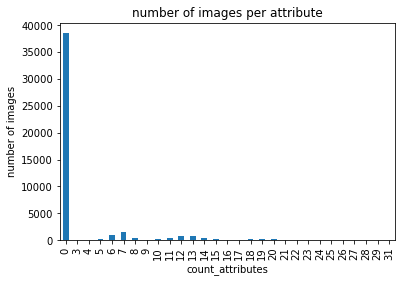

In [15]:
df3.groupby(['count_attributes'])['ImageId'].count().plot(kind='bar')
plt.title("number of images per attribute")
plt.ylabel("number of images")

 a.In the above plot we see number of images with 0 attributes is large.
 
 b.The distribution is skewed.
 
 c.There are fewer images with large attribute counts.


In [14]:
df4=df3.groupby(['count_attributes'])['ImageId'].count().to_frame('number_of_images').reset_index()

In [15]:
df4

,count_attributes,number_of_images
0,0,38523
1,3,3
2,4,24
3,5,211
4,6,908
5,7,1440
6,8,346
7,9,100
8,10,195
9,11,434


Text(0.5, 1.0, 'kde plot of number of images per attribute')

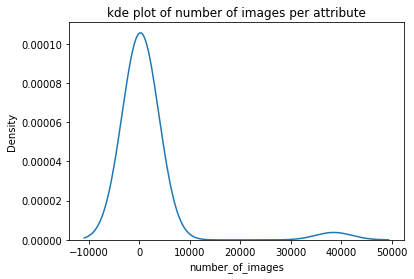

In [16]:
sns.distplot(df4['number_of_images'],hist=False)
plt.title("kde plot of number of images per attribute")

a. Distribution is centered around 0 

b. its right tailed normal distribution

c. skewed distribution

Text(0.5, 1.0, 'number of images per category')

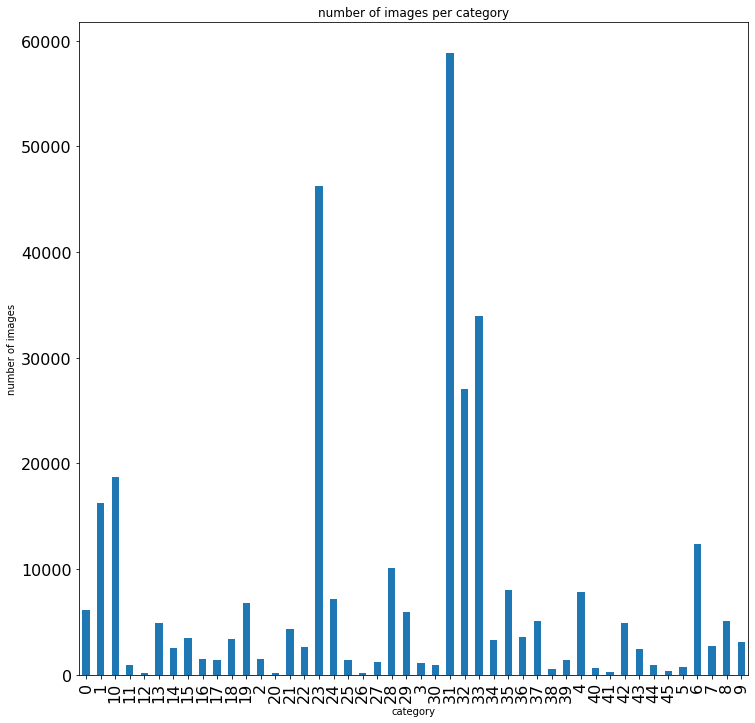

In [23]:
train_df.groupby(['category'])['ImageId'].count().plot(kind='bar',figsize=(12,12),fontsize=16)
plt.ylabel('number of images')
plt.title('number of images per category')

a.category 31 has highest number of images i.e . around 6000.

b.category 12,20,26,41,45 is found in lowest number of images.

c.category 1,10,23,32,33 is found in  fairly high amount of images.

rle 2mask function

In [104]:
#https://www.kaggle.com/kimwoojeong/simple-eda-imaterialist-fashion-2019-at-fgvc6
'''
THE FUNCTION CONVERTS RUN LENGTH ENCODING GIVEN TO CORRESPONDING IMAGE ID 
IN TRAIN.CSV FILE TO MASK . THIS IS THE TRUE MASK IMAGE.
IT TAKES IMAGE_FILENAME  , RLE , CATEGORY LIST,HEIGHT AND WIDTH OF IMAGE 
AS INPUT AND OUTPUTS THE MASK OF FIXED SIZE (512,512)
'''





def rle2mask(image_filename,mask_rle,cat,H,W):

   
   
   mask=np.ones((H*W),dtype='uint8')*255

   en_list=mask_rle

   cat = np.int32(cat)
   sorted_index = np.argsort(cat)
   
   for i in sorted_index:


     px_list=list(map(int,en_list[i].split(" ")[0::2]))
     
    
     px_count_list=list(map(int,en_list[i].split(" ")[1::2]))
     
    
     cat_list=int(cat[i])
     
     tu=list(map(lambda x, y:(x,y), px_list, px_count_list))
     for p,m in tu:
       
        mask[p:p+m]=cat_list
       
   
   mask = mask.reshape((W,H)).T
   mask=cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
   mask=cv2.resize(mask, (512, 512),interpolation=cv2.INTER_NEAREST)
  
   return mask


In [12]:
image_df = train_df.groupby('ImageId')['EncodedPixels', 'category'].agg(lambda x: list(x))
size_df = train_df.groupby('ImageId')['Height', 'Width'].mean()
image_df = image_df.join(size_df, on='ImageId')

print("Total images: ", len(image_df))
image_df.head()

Total images:  45195


,EncodedPixels,category,Height,Width
ImageId,,,,
00000663ed1ff0c4e0132b9b9ac53f6e.jpg,[6068157 7 6073371 20 6078584 34 6083797 48 60...,"[6, 0, 28, 31, 32, 32, 31, 29, 4]",5214,3676
0000fe7c9191fba733c8a69cfaf962b7.jpg,[2201176 1 2203623 3 2206071 5 2208518 8 22109...,"[33, 1]",2448,2448
0002ec21ddb8477e98b2cbb87ea2e269.jpg,[2673735 2 2676734 8 2679734 13 2682733 19 268...,"[33, 10, 23, 23]",3000,1997
0002f5a0ebc162ecfb73e2c91e3b8f62.jpg,[435 132 1002 132 1569 132 2136 132 2703 132 3...,"[10, 33, 15]",567,400
0004467156e47b0eb6de4aa6479cbd15.jpg,[132663 8 133396 25 134130 41 134868 53 135611...,"[10, 33, 31, 31, 15]",750,500


In [13]:
image_df2=image_df.reset_index()

In [10]:
image_df2.head()

,ImageId,EncodedPixels,category,Height,Width
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,[6068157 7 6073371 20 6078584 34 6083797 48 60...,"[6, 0, 28, 31, 32, 32, 31, 29, 4]",5214,3676
1,0000fe7c9191fba733c8a69cfaf962b7.jpg,[2201176 1 2203623 3 2206071 5 2208518 8 22109...,"[33, 1]",2448,2448
2,0002ec21ddb8477e98b2cbb87ea2e269.jpg,[2673735 2 2676734 8 2679734 13 2682733 19 268...,"[33, 10, 23, 23]",3000,1997
3,0002f5a0ebc162ecfb73e2c91e3b8f62.jpg,[435 132 1002 132 1569 132 2136 132 2703 132 3...,"[10, 33, 15]",567,400
4,0004467156e47b0eb6de4aa6479cbd15.jpg,[132663 8 133396 25 134130 41 134868 53 135611...,"[10, 33, 31, 31, 15]",750,500


Creating dictionary of category and imageid

In [14]:
tr=train_df.groupby('category')['ImageId'].agg(lambda x: list(x)).to_frame('imageid').reset_index()


In [15]:
tr['category']=tr['category'].astype('int')

In [16]:
tr1=tr.sort_values('category', ascending=True)

In [17]:
tr1 = tr1.reset_index(drop=True)

In [18]:
tr1

,category,imageid
0,0,"[00000663ed1ff0c4e0132b9b9ac53f6e.jpg, 0010ef2..."
1,1,"[0000fe7c9191fba733c8a69cfaf962b7.jpg, 00048c3..."
2,2,"[003a6ca3eaa7886da61ed2de2c5e8d27.jpg, 003ad8a..."
3,3,"[000aac3870ea7c59ca0333ffa5327323.jpg, 00573a5..."
4,4,"[00000663ed1ff0c4e0132b9b9ac53f6e.jpg, 000c5bb..."
5,5,"[009447b79fce7da1ee19a54401517cde.jpg, 011b635..."
6,6,"[00000663ed1ff0c4e0132b9b9ac53f6e.jpg, 000775b..."
7,7,"[000cd2e13d1bdd28f480304d7bb9e1ca.jpg, 00211c0..."
8,8,"[00048c3a2fb9c29340473c4cfc06424a.jpg, 0006ea8..."
9,9,"[003a6ca3eaa7886da61ed2de2c5e8d27.jpg, 0050bcb..."


In [19]:
tr1.columns


Index(['category', 'imageid'], dtype='object')

In [20]:
my_dict = {k:v for k,v in zip(tr1['category'], tr1.drop(columns='category').values)}


Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(image_df2, test_size = 0.2,random_state=42)
X_train, X_val = train_test_split(X_train, test_size = 0.2,random_state=42)
print('train shape : ',X_train.shape)
print('test shape : ', X_test.shape)
print('val shape : ', X_val.shape)
     


train shape :  (28924, 5)
test shape :  (9039, 5)
val shape :  (7232, 5)


<b>4. TF Data Pipeline</b> 

In [22]:

def parse_image(i,m):
    '''
    THIS FUNCTION READS IMAGE AND MASK STORED ON LOCAL DISK
    RESIZED THE IMAGE TO 256 * 256 WHICH WILL BE INPUT TO MODEL
    DECODES JPEG IMAGE AND PNG MASK
    '''
    
    image = tf.io.read_file(r'D:/fashion imaterialist case study/train/'+i)
    image = tf.image.decode_jpeg(image,channels=3)
   
    image = tf.image.resize(image, [256, 256])
    image = image / 255
    
    
    mask = tf.io.read_file(r'D:/tr_1/'+m)
    
    mask = tf.image.decode_png(mask,channels=3)
    
    mask=tf.image.rgb_to_grayscale(mask)
    mask=tf.image.resize(mask,[256,256],method='nearest')
    
    
    mask=tf.where(condition=tf.math.equal(mask, 255), x=tf.cast(46, dtype=mask.dtype), y=mask)
    mask=tf.cast(mask,'float32')
    
    return image,mask
     

In [23]:
def random_augmentation(img, mask):
    '''
    THIS FUNCTION FLIPS IMAGE AND MASK FROM LEFT TO RIGHT
    RANDOM AUGMENTATION
    '''
    if tf.random.uniform(()) > 0.5:
        img = tf.image.flip_left_right(img)
        mask = tf.image.flip_left_right(mask)
    

    return img, mask

In [106]:
# CREATING MASK USING FUNCTION RLETOMASK
from PIL import Image


out_path=r'D:/tr_1/'
temp_df = pd.concat([image_df2["ImageId"],image_df2["EncodedPixels"],image_df2["category"],image_df2["Height"],image_df2["Width"]], axis=1)
temp_df.head()
for index, row in temp_df.iterrows():
    mask = rle2mask(row["ImageId"], row["EncodedPixels"], row["category"], row["Height"], row["Width"])
    im = Image.fromarray(mask)
    im.save(out_path+row["ImageId"].replace('.jpg', '.png'))
    


In [24]:
#https://www.tensorflow.org/guide/data
def tfdata_train(Tr,batch_size=5):
      '''
      THIS FUNCTION CREATES TF DATASET FROM TENSOR SLICES OF 
      IMAGE AND MASK TRAIN DATA THEN IT SHUFFLES IT MAPS THE PARSE_IMAGE FUNCTION,RANDOM_AUGMENTATION
      AND BATCHES IT TO BATCH_SIZE AND PREFETCHES THE DATA DURING TRAINING PROCESS
      '''
      

      f = Tr["ImageId"]
      g = Tr["ImageId"].str.replace('.jpg','.png',regex=False)
      
      train_dataset=tf.data.Dataset.from_tensor_slices((f,g))
      train_dataset= train_dataset.shuffle(len(f))
      train_dataset= train_dataset.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
      train_dataset = train_dataset.map(random_augmentation, num_parallel_calls=tf.data.experimental.AUTOTUNE)
      train_dataset = train_dataset.batch(batch_size)
      train_dataset = train_dataset.prefetch(buffer_size=3)  
      return train_dataset
    

In [25]:
# https://www.tensorflow.org/guide/data
def tfdata_val(Val,batch_size=5):
    
    '''
    THIS FUNCTION CREATES TF DATASET FROM TENSOR SLICES OF 
    IMAGE AND MASK VALIDATION DATA THEN IT SHUFFLES IT MAPS THE PARSE_IMAGE FUNCTION
    AND BATCHES IT TO BATCH_SIZE  DURING TRAINING PROCESS
    '''
    f = Val["ImageId"]
    g = Val["ImageId"].str.replace('.jpg','.png',regex=False)
    val_dataset = tf.data.Dataset.from_tensor_slices((f,g))
    val_dataset = val_dataset.shuffle(len(f))
    val_dataset = val_dataset.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    val_dataset = val_dataset.batch(batch_size)
    
    return val_dataset

In [26]:
#https://www.tensorflow.org/guide/data
def tfdata_test(Test,batch_size=5):
  '''
  THIS FUNCTION CREATES TF DATASET FROM TENSOR SLICES OF 
  IMAGE AND MASK TEST DATA THEN IT SHUFFLES IT MAPS THE PARSE_IMAGE FUNCTION
  AND BATCHES IT TO BATCH_SIZE  DURING TRAINING PROCESS.
  '''
  f = Test["ImageId"]
  g = Test["ImageId"].str.replace('.jpg','.png',regex=False)
  test_dataset = tf.data.Dataset.from_tensor_slices((f, g))
  test_dataset = test_dataset.map(parse_image)
  test_dataset = test_dataset.batch(batch_size)
  
  return test_dataset

In [27]:
train_dataset=tfdata_train(X_train)

In [28]:
val_dataset=tfdata_val(X_val)

In [29]:

test_dataset =tfdata_test(X_test)

In [30]:
#https://www.tensorflow.org/tutorials/images/segmentation
def display(display_list):
  '''
  THIS FUNCTION DISPLAYS INPUT IMAGE AND TRUE MASK 
  FROM TF DATASET CREATED ABOVE
  '''
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

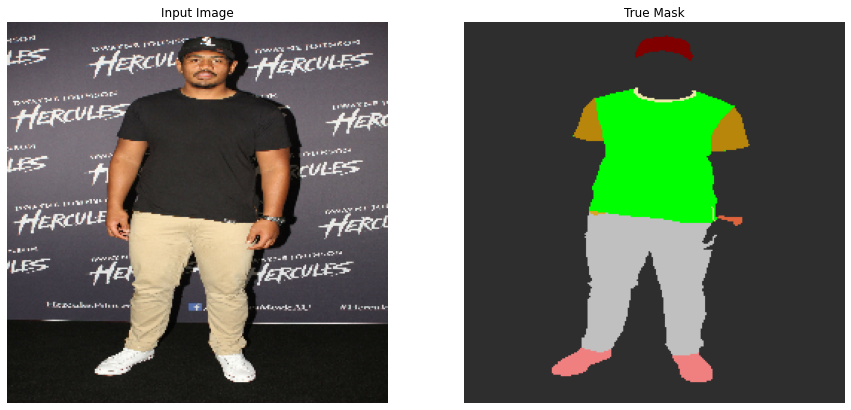

In [31]:
#PLOTTING IMAGE AND TRUE COLOR CODED MASK
colormap=[[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255],[192,192,192],[128,128,128],[128,0,0],[128,128,0],[0,128,0],[128,0,128],[0,128,128],[0,0,128],[128,0,0],[139,0,0],[165,42,42],[178,34,34],[220,20,60],[255,0,0],[255,99,71],[255,127,80],[205,92,92],[240,128,128],[233,150,122],[250,128,114],[255,160,122],[255,69,0],[255,140,0],[255,165,0],[255,215,0],[184,134,11],[218,165,32],[238,232,170],[189,183,107],[240,230,140],[128,128,0],[154,205,50],[85,107,47],[107,142,35],[124,252,0],[127,255,0],[173,255,47],[0,100,0],[0,128,0],[34,139,34]]
for image, mask in train_dataset.take(1):
  sample_image, sample_mask = image, mask

for i in range (0,46):
   sample_mask= np.where(sample_mask[:,:]==i,colormap[i],sample_mask)
display([sample_image[0], sample_mask[0]])

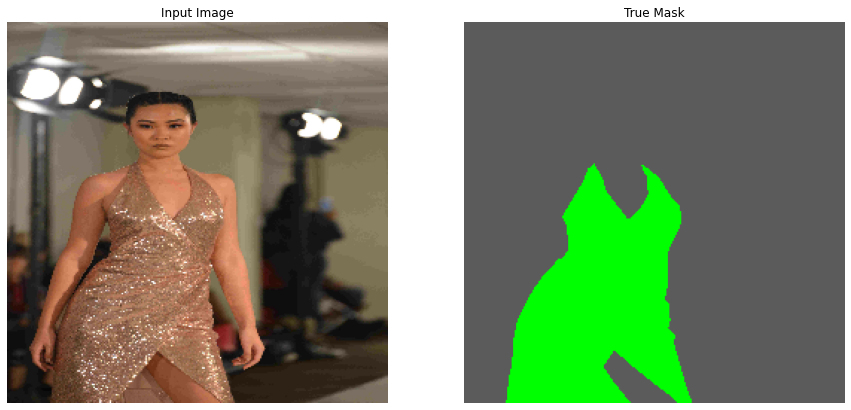

In [32]:
colormap=[[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255],[192,192,192],[128,128,128],[128,0,0],[128,128,0],[0,128,0],[128,0,128],[0,128,128],[0,0,128],[128,0,0],[139,0,0],[165,42,42],[178,34,34],[220,20,60],[255,0,0],[255,99,71],[255,127,80],[205,92,92],[240,128,128],[233,150,122],[250,128,114],[255,160,122],[255,69,0],[255,140,0],[255,165,0],[255,215,0],[184,134,11],[218,165,32],[238,232,170],[189,183,107],[240,230,140],[128,128,0],[154,205,50],[85,107,47],[107,142,35],[124,252,0],[127,255,0],[173,255,47],[0,100,0],[0,128,0],[34,139,34]]
for image, mask in val_dataset.take(1):
  sample_image, sample_mask = image, mask
for i in range (0,46):
   sample_mask= np.where(sample_mask[:,:]==i,colormap[i],sample_mask)
display([sample_image[0], sample_mask[0]])

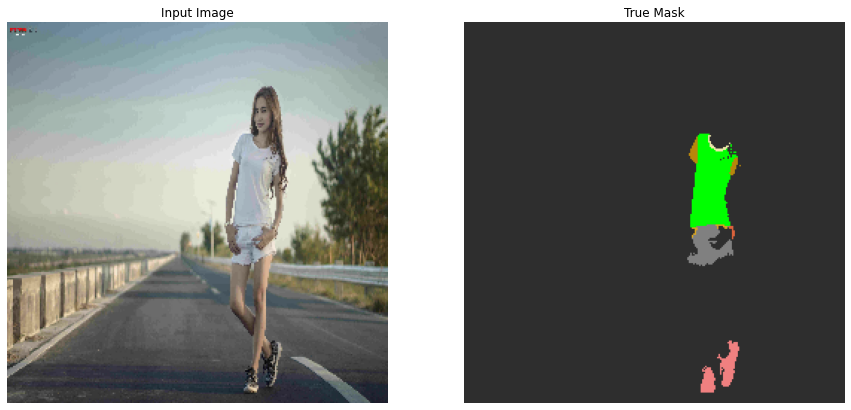

In [33]:
colormap=[[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255],[192,192,192],[128,128,128],[128,0,0],[128,128,0],[0,128,0],[128,0,128],[0,128,128],[0,0,128],[128,0,0],[139,0,0],[165,42,42],[178,34,34],[220,20,60],[255,0,0],[255,99,71],[255,127,80],[205,92,92],[240,128,128],[233,150,122],[250,128,114],[255,160,122],[255,69,0],[255,140,0],[255,165,0],[255,215,0],[184,134,11],[218,165,32],[238,232,170],[189,183,107],[240,230,140],[128,128,0],[154,205,50],[85,107,47],[107,142,35],[124,252,0],[127,255,0],[173,255,47],[0,100,0],[0,128,0],[34,139,34]]

for image, mask in test_dataset.take(1):
  sample_image, sample_mask = image, mask
for i in range (0,46):
   sample_mask= np.where(sample_mask[:,:]==i,colormap[i],sample_mask)
display([sample_image[0], sample_mask[0]])

In [34]:
n = tf.keras.metrics.MeanIoU(num_classes=47)
def get_mean_iou(y_true, y_pred):
    '''
    THIS FUNCTION IS IOU METRIC FUNCTION.IT TAKES Y_TRUE AND Y_PRED WHICH IS TRUE MASK AND PREDICTED MASK COMPUTES 
    INTERSECTION OVER UNION WITH THESE MASK IMAGES.The metric sweeps over a range of IoU thresholds, at each point calculating an average precision value. 
    The threshold values range from 0.5 to 0.95 with a step size of 0.05: (0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95). 
    In other words, at a threshold of 0.5, a predicted object is considered a "hit" if its intersection over union with a ground truth object is greater than 0.5.
    '''
    y_true=tf.one_hot(tf.cast(y_true, dtype='int32'),47)
    for t in np.arange(0.5, 0.95, 0.05):
        y_pred = tf.where(condition=tf.math.greater(y_pred, tf.cast(t, y_pred.dtype)), x=tf.cast(1, y_pred.dtype), y=y_pred)
        y_pred = tf.where(condition=tf.math.less_equal(y_pred, tf.cast(t, y_pred.dtype)), x=tf.cast(0,y_pred.dtype), y=y_pred)
        
        n.update_state(y_true, y_pred)
    r = n.result().numpy()
    
    n.reset_states()
    return r

<b>5. Deep Learning Model UNet</b>

THE MODEL ARCHITECTURE TAKEN FROM https://coderoad.ru/59343661/Unet-%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%BE%D0%B2%D0%B0%D1%8F-%D0%A1%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F-%D0%98%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9

In [35]:
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, UpSampling2D, concatenate,Dropout,Reshape
from tensorflow.keras.models import Model
def soft1(x):
    return tf.keras.activations.softmax(x)

def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):

    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)


    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)

    return x

def get_unet(input_img, n_classes, n_filters = 16, dropout = 0.1, batchnorm = True):
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)

    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)

    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)

    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)

    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)

    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)

    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)

    outputs = Conv2D(47, (1, 1), activation='softmax') (c9)
    model1 = Model(inputs=[input_img], outputs=[outputs])
    return model1

    

    

In [36]:
tf.keras.backend.clear_session()
input_img = Input((256, 256, 3), name='img')
model1 = get_unet(input_img,n_classes=47, n_filters=16, dropout=0.05, batchnorm=True)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 448         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 16) 0           batch_normalization_1[0][0]      
______________________________________________________________________________________________

<b>6.Training UNet</b> 

In [85]:
import datetime
import os

EPOCHS = 10
BATCH_SIZE=128

STEPS_PER_EPOCH = X_train.shape[0] // BATCH_SIZE
VALIDATION_STEPS = X_val.shape[0] // BATCH_SIZE
    
tensorboard_callback = tf.keras.callbacks.TensorBoard('./logs', histogram_freq=1)

callbacks = [
    
    # to collect some useful metrics and visualize them in tensorboard
    tensorboard_callback,
    # if no accuracy improvements we can stop the training directly
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    # to save checkpoints
    tf.keras.callbacks.ModelCheckpoint('best_model_unet.h5', verbose=1, save_weights_only=True)
     ]



# # here I'm using a new optimizer: https://arxiv.org/abs/1908.03265
optimizer=tf.keras.optimizers.Adam(lr=1e-3)

loss = tf.keras.losses.SparseCategoricalCrossentropy()

model1.compile(optimizer=optimizer, loss = loss,
                  metrics=[get_mean_iou])
model_history = model1.fit(train_dataset, epochs=EPOCHS,
                    steps_per_epoch=STEPS_PER_EPOCH,batch_size=BATCH_SIZE,
                    validation_steps=VALIDATION_STEPS,
                    validation_data=val_dataset,
                    callbacks=callbacks)


Epoch 1/10
225/225 [==============================] - ETA: 0s - loss: 2.5622 - get_mean_iou: 0.5189
Epoch 00001: saving model to best_model_unet.h5
225/225 [==============================] - 866s 4s/step - loss: 2.5622 - get_mean_iou: 0.5189 - val_loss: 1.4890 - val_get_mean_iou: 0.6236
Epoch 2/10
225/225 [==============================] - ETA: 0s - loss: 1.0548 - get_mean_iou: 0.8000
Epoch 00002: saving model to best_model_unet.h5
225/225 [==============================] - 404s 2s/step - loss: 1.0548 - get_mean_iou: 0.8000 - val_loss: 0.9087 - val_get_mean_iou: 0.8473
Epoch 3/10
225/225 [==============================] - ETA: 0s - loss: 0.8949 - get_mean_iou: 0.8295 - ETA: 15s - loss: 0.8977 - 
Epoch 00003: saving model to best_model_unet.h5
225/225 [==============================] - 466s 2s/step - loss: 0.8949 - get_mean_iou: 0.8295 - val_loss: 0.8599 - val_get_mean_iou: 0.8253
Epoch 4/10
225/225 [==============================] - ETA: 0s - loss: 0.8537 - get_mean_iou: 0.8316
Epoch 0

TRAINING FOR NEXT 10 EPOCHS

In [28]:
model1.load_weights('best_model_unet.h5')

In [33]:
model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=[get_mean_iou])

In [51]:
EPOCHS = 10
BATCH_SIZE=128

STEPS_PER_EPOCH = X_train.shape[0] // BATCH_SIZE
VALIDATION_STEPS = X_val.shape[0] // BATCH_SIZE
    
tensorboard_callback = tf.keras.callbacks.TensorBoard('./logs', histogram_freq=1)

callbacks = [
    
    # to collect some useful metrics and visualize them in tensorboard
    tensorboard_callback,
    # if no accuracy improvements we can stop the training directly
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    # to save checkpoints
    tf.keras.callbacks.ModelCheckpoint('best_model_unet1.h5', verbose=1, save_weights_only=True)
     ]



# # here I'm using a new optimizer: https://arxiv.org/abs/1908.03265
optimizer=tf.keras.optimizers.Adam(lr=1e-3)

loss = tf.keras.losses.SparseCategoricalCrossentropy()

model1.compile(optimizer=optimizer, loss = loss,
                  metrics=[get_mean_iou])
model_history = model1.fit(train_dataset, epochs=EPOCHS,
                    steps_per_epoch=STEPS_PER_EPOCH,batch_size=BATCH_SIZE,
                    validation_steps=VALIDATION_STEPS,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
  1/225 [..............................] - ETA: 0s - loss: 0.9095 - get_mean_iou: 0.7702WARNING:tensorflow:From C:\Users\acer\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
225/225 [==============================] - ETA: 0s - loss: 0.7665 - get_mean_iou: 0.8457
Epoch 00001: saving model to best_model_unet1.h5
225/225 [==============================] - 285s 1s/step - loss: 0.7665 - get_mean_iou: 0.8457 - val_loss: 0.7862 - val_get_mean_iou: 0.8459
Epoch 2/10
225/225 [==============================] - ETA: 0s - loss: 0.7615 - get_mean_iou: 0.8451
Epoch 00002: saving model to best_model_unet1.h5
225/225 [==============================] - 275s 1s/step - loss: 0.7615 - get_mean_iou: 0.8451 - val_loss: 0.7052 - val_get_mean_iou: 0.8559
Epoch 3/10
225/225 [===============

TRAINIG UNET FOR NEXT 20 EPOCHS

In [22]:
model1.load_weights('best_model_unet1.h5')

In [ ]:
model1.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=[get_mean_iou])

In [23]:
EPOCHS = 20
BATCH_SIZE=128

STEPS_PER_EPOCH = X_train.shape[0] // BATCH_SIZE
VALIDATION_STEPS = X_val.shape[0] // BATCH_SIZE
    
tensorboard_callback = tf.keras.callbacks.TensorBoard('./logs', histogram_freq=1)

callbacks = [
    
    # to collect some useful metrics and visualize them in tensorboard
    tensorboard_callback,
    # if no accuracy improvements we can stop the training directly
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    # to save checkpoints
    tf.keras.callbacks.ModelCheckpoint('best_model_unet2.h5', verbose=1, save_weights_only=True)
     ]



# # here I'm using a new optimizer: https://arxiv.org/abs/1908.03265
optimizer=tf.keras.optimizers.Adam(lr=1e-3)

loss = tf.keras.losses.SparseCategoricalCrossentropy()

model1.compile(optimizer=optimizer, loss = loss,
                  metrics=[get_mean_iou])
model_history = model1.fit(train_dataset, epochs=EPOCHS,
                    steps_per_epoch=STEPS_PER_EPOCH,batch_size=BATCH_SIZE,
                    validation_steps=VALIDATION_STEPS,
                    validation_data=val_dataset,
                    callbacks=callbacks)


Epoch 1/20
  1/225 [..............................] - ETA: 0s - loss: 0.4548 - get_mean_iou: 0.8984WARNING:tensorflow:From C:\Users\acer\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
225/225 [==============================] - ETA: 0s - loss: 0.6989 - get_mean_iou: 0.8557
Epoch 00001: saving model to best_model_unet2.h5
225/225 [==============================] - 574s 3s/step - loss: 0.6989 - get_mean_iou: 0.8557 - val_loss: 0.6707 - val_get_mean_iou: 0.8596
Epoch 2/20
225/225 [==============================] - ETA: 0s - loss: 0.7223 - get_mean_iou: 0.8522
Epoch 00002: saving model to best_model_unet2.h5
225/225 [==============================] - 318s 1s/step - loss: 0.7223 - get_mean_iou: 0.8522 - val_loss: 0.6896 - val_get_mean_iou: 0.8537
Epoch 3/20
225/225 [===============

In [39]:
%load_ext tensorboard

In [40]:
%tensorboard --logdir='./logs'

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 11656.

TRAINING UNET FOR NEXT 39 EPOCHS

In [23]:
model1.load_weights('best_model_unet2.h5')

In [39]:
model1.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=[get_mean_iou])

In [42]:
initial_epoch=19
EPOCHS = initial_epoch+20
BATCH_SIZE=128
#s=int(np.ceil(X_train.shape[0] / float(BATCH_SIZE)))
#v=int(np.ceil(X_val.shape[0] / float(BATCH_SIZE)))
STEPS_PER_EPOCH = X_train.shape[0] // BATCH_SIZE
VALIDATION_STEPS = X_val.shape[0] // BATCH_SIZE
    #logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard('./logs', histogram_freq=1)
#initial_epoch = model1.optimizer.iterations.numpy() // STEPS_PER_EPOCH
callbacks = [
    # to show samples after each epoch
    #DisplayCallback(),
    # to collect some useful metrics and visualize them in tensorboard
    tensorboard_callback,
    # if no accuracy improvements we can stop the training directly
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    # to save checkpoints
    tf.keras.callbacks.ModelCheckpoint('best_model_unet3.h5', verbose=1, save_weights_only=True)
     ]



# # here I'm using a new optimizer: https://arxiv.org/abs/1908.03265
optimizer=tf.keras.optimizers.Adam(lr=1e-3)

loss = tf.keras.losses.SparseCategoricalCrossentropy()

model1.compile(optimizer=optimizer, loss = loss,
                  metrics=[get_mean_iou])
model_history = model1.fit(train_dataset, epochs=EPOCHS,initial_epoch=initial_epoch,
                    steps_per_epoch=STEPS_PER_EPOCH,batch_size=BATCH_SIZE,
                    validation_steps=VALIDATION_STEPS,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 20/39
  1/225 [..............................] - ETA: 3s - loss: 0.4462 - get_mean_iou: 0.8733WARNING:tensorflow:From C:\Users\acer\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
225/225 [==============================] - ETA: 0s - loss: 0.5986 - get_mean_iou: 0.8697
Epoch 00020: saving model to best_model_unet3.h5
225/225 [==============================] - 263s 1s/step - loss: 0.5986 - get_mean_iou: 0.8697 - val_loss: 0.5726 - val_get_mean_iou: 0.8734
Epoch 21/39
225/225 [==============================] - ETA: 0s - loss: 0.5788 - get_mean_iou: 0.8723
Epoch 00021: saving model to best_model_unet3.h5
225/225 [==============================] - 236s 1s/step - loss: 0.5788 - get_mean_iou: 0.8723 - val_loss: 0.6160 - val_get_mean_iou: 0.8650
Epoch 22/39
225/225 [============

In [40]:
model1.load_weights('best_model_unet3.h5')

In [41]:
# TEST LOSS FOR LAST 39 EPOCHS
pd.DataFrame(np.array(model1.evaluate(test_dataset,steps=9039//128)).reshape(1,-1),columns=['test_loss','test_iou'])

70/70 [==============================] - 433s 6s/step - loss: 0.5203 - get_mean_iou: 0.8789


,test_loss,test_iou
0,0.550602,0.873996


In [24]:



#test_loss of 20 epochs
pd.DataFrame(np.array(model1.evaluate(test_dataset,steps=9039//128)).reshape(1,-1),columns=['test_loss','test_iou'])

70/70 [==============================] - 63s 899ms/step - loss: 0.5875 - get_mean_iou: 0.8675


,test_loss,test_iou
0,0.58747,0.867521


In [36]:
#test_loss of first 10 epochs
pd.DataFrame(np.array(model1.evaluate(test_dataset,steps=9039//128)).reshape(1,-1),columns=['test_loss','test_iou'])

70/70 [==============================] - 59s 837ms/step - loss: 0.7482 - get_mean_iou: 0.8413


,test_loss,test_iou
0,0.748208,0.841303


In [52]:
#test_loss of second 10 epochs
pd.DataFrame(np.array(model1.evaluate(test_dataset,steps=9039//128)).reshape(1,-1),columns=['test_loss','test_iou'])

70/70 [==============================] - 48s 692ms/step - loss: 0.7014 - get_mean_iou: 0.8536


,test_loss,test_iou
0,0.701428,0.853567


<b>7. Displaying Predictions</b> 

In [37]:
#https://www.tensorflow.org/tutorials/images/segmentation
def display_sample(display_list):
    """Show side-by-side an input image,
    the ground truth and the prediction.
    """
    plt.figure(figsize=(18, 18))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [39]:
model1.load_weights('best_model_unet3.h5')

In [81]:
model1.save("model.h5")

In [72]:
# https://www.tensorflow.org/tutorials/images/segmentation
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  
  pred_mask = pred_mask[..., tf.newaxis]
  
  return pred_mask
def show_predictions(dataset=None, num=0, cat=0):
    '''
    DISPLAYING PREDICTIONS PER CATEGORY
    '''
    if dataset:
     for image in dataset:
        m   = image.replace('.jpg', '.png')
        image = tf.io.read_file(r'D:/fashion imaterialist case study/train/'+image)
        image = tf.image.decode_jpeg(image,channels=3)
        image = tf.image.resize(image, [256, 256])
        image = image/255
        image = image[tf.newaxis, ...]
        
        mask  =   tf.io.read_file(r'D:/tr_1/'+m)
        mask = tf.image.decode_png(mask,channels=3)
        mask=tf.image.rgb_to_grayscale(mask)
        mask=tf.image.resize(mask,[256,256],method='nearest')
        mask=tf.where(condition=tf.math.equal(mask, 255), x=tf.cast(46, dtype=mask.dtype), y=mask)
        mask = mask[tf.newaxis, ...]
        true_mask = tf.equal(mask,tf.constant(cat,dtype='uint8'))
        pred_mask = model1.predict(image)
        pred_mask = create_mask(pred_mask)
        pred_mask = tf.equal(pred_mask, tf.constant(cat, dtype='int64'))
        
        
        display_sample([image[0],true_mask[0],pred_mask[0]])
    else:
      display_sample([sample_image, sample_mask,
             create_mask(model1.predict(sample_image[tf.newaxis, ...]))])

In [50]:
#https://www.tensorflow.org/tutorials/images/segmentation
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  
  
  pred_mask = pred_mask[..., tf.newaxis]
 
  return pred_mask
def show_predictions1(dataset=None):
  if dataset:
    for image, mask in dataset:
      
      pred_mask = model1.predict(image)
    
      pred_mask2=create_mask(pred_mask)
      
      display_sample([image[0], mask[0], pred_mask2[0]])
      
      
  else:
    display_sample([sample_image, sample_mask,
             create_mask(model1.predict(sample_image[tf.newaxis, ...]))])

Random sampled image mask prediction

In [42]:
df14=image_df2.sample(n=5)

In [80]:
sample=tfdata_test(df14,batch_size=1)

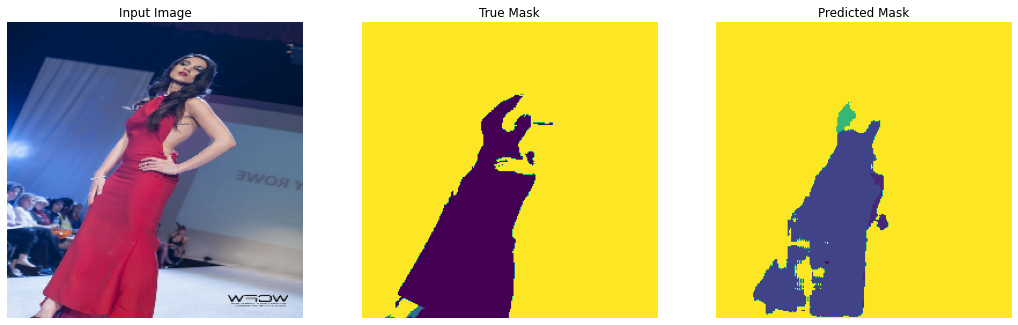

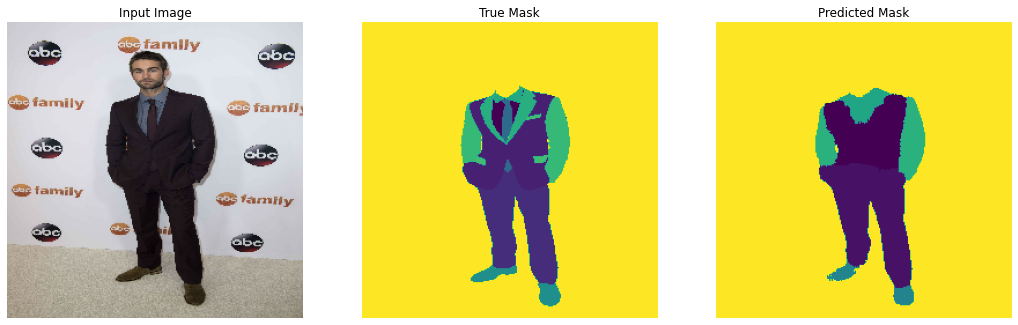

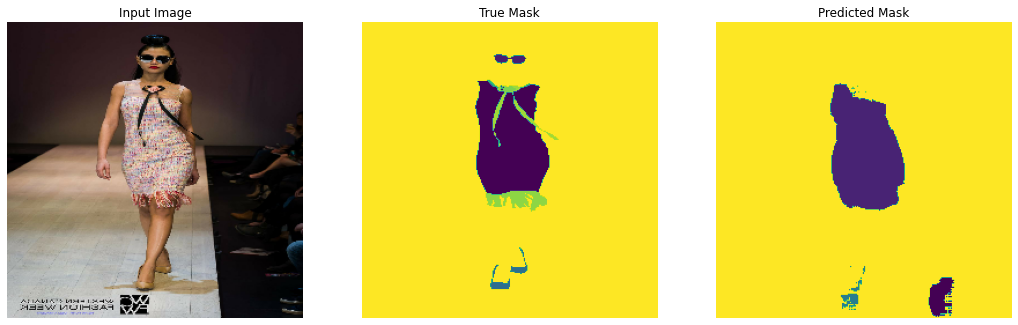

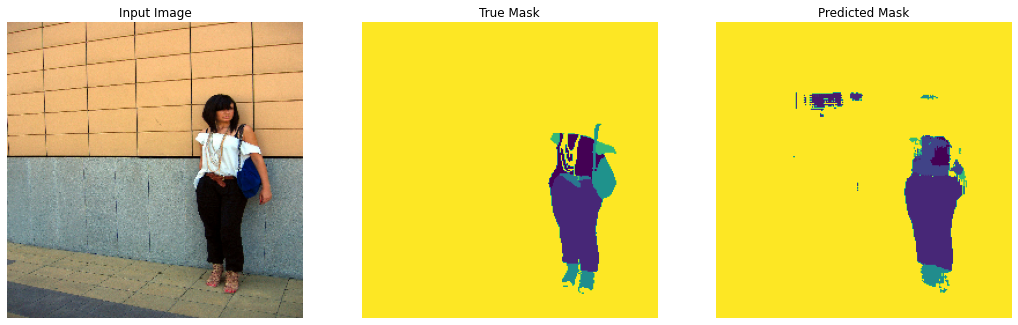

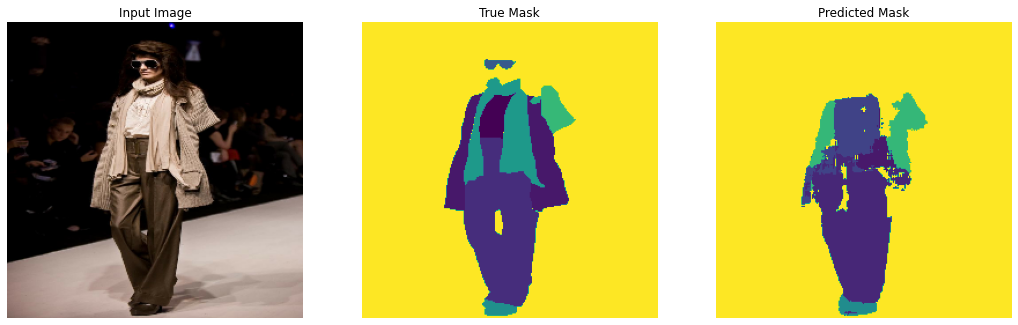

In [74]:
show_predictions1(sample)

Predictions for category 31 sleeve the most found category among images

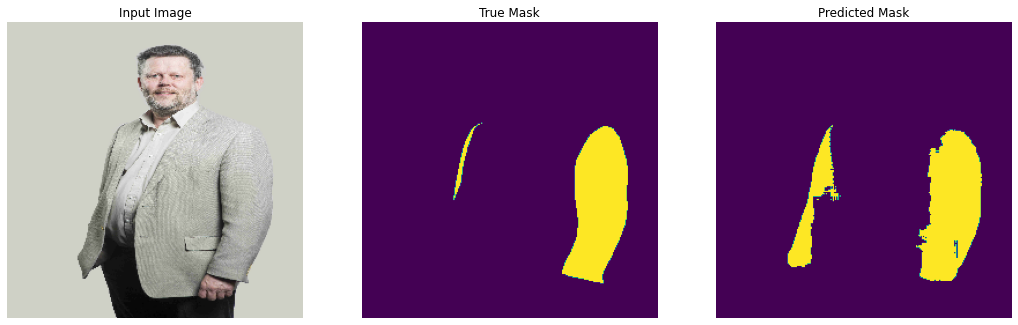

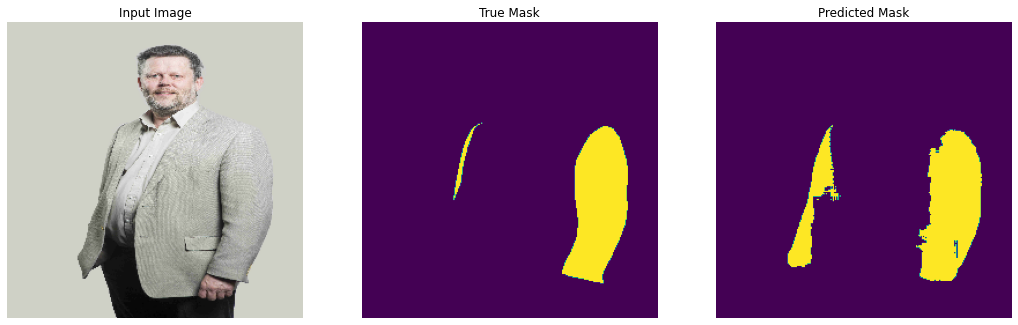

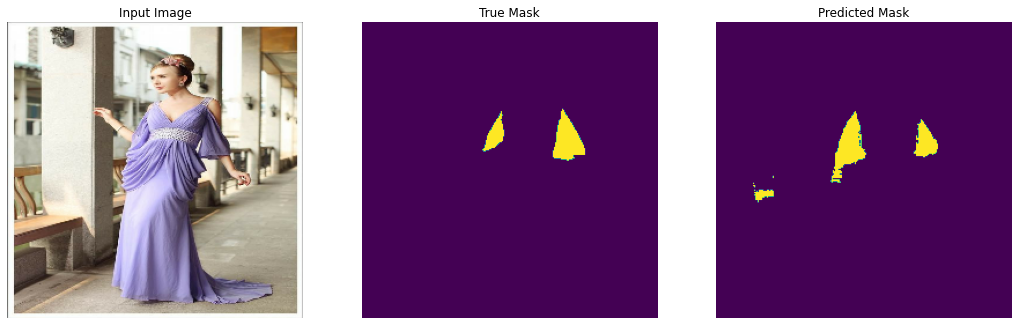

In [74]:
show_predictions(my_dict.get(31)[0][0:3], cat=31)

<b>8. MODEL QUANTISATION</b> 

In [26]:
#https://www.youtube.com/watch?v=IuyTC-_otGw&t=3s
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [27]:
#https://www.youtube.com/watch?v=IuyTC-_otGw&t=3s
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [28]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [107]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model1)
#tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpi017rcgc\assets


INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpi017rcgc\assets


In [108]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

2374576

In [109]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File size: 2318.922 Kilobytes


In [110]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 256 256   3]
Input Type: <class 'numpy.float32'>
Output Shape: [  1 256 256  47]
Output Type: <class 'numpy.float32'>


In [111]:
interpreter.resize_tensor_input(input_details[0]['index'], (1, 256, 256,3))
interpreter.resize_tensor_input(output_details[0]['index'], (1,256,256,47))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 256 256   3]
Input Type: <class 'numpy.float32'>
Output Shape: [  1 256 256  47]
Output Type: <class 'numpy.float32'>


(1, 256, 256, 3)
Prediction results shape: (1, 256, 256, 47)


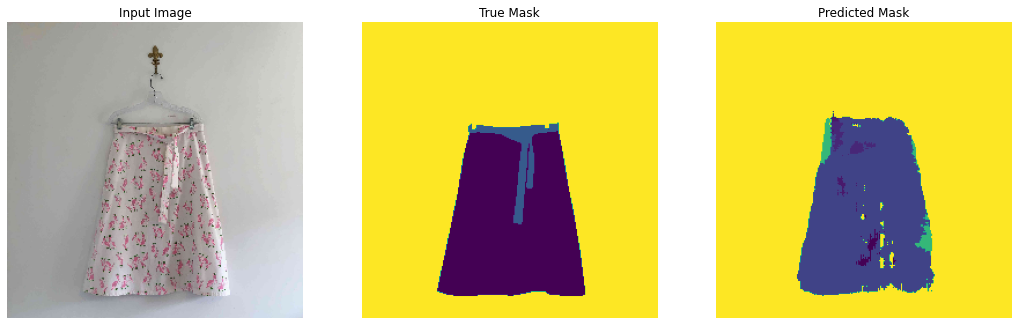

(1, 256, 256, 3)
Prediction results shape: (1, 256, 256, 47)


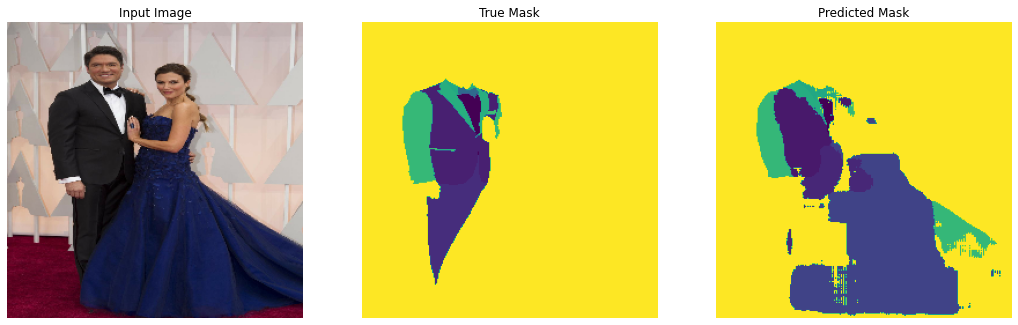

(1, 256, 256, 3)
Prediction results shape: (1, 256, 256, 47)


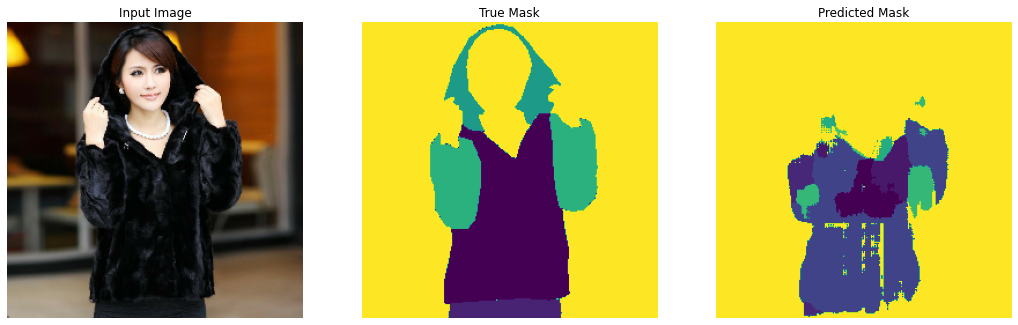

(1, 256, 256, 3)
Prediction results shape: (1, 256, 256, 47)


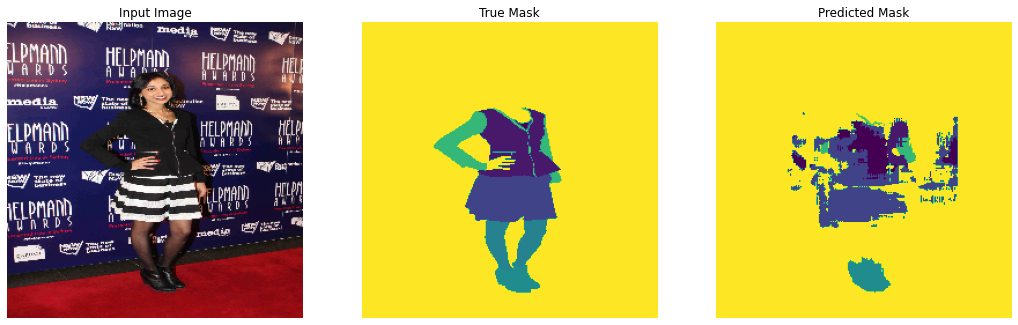

(1, 256, 256, 3)
Prediction results shape: (1, 256, 256, 47)


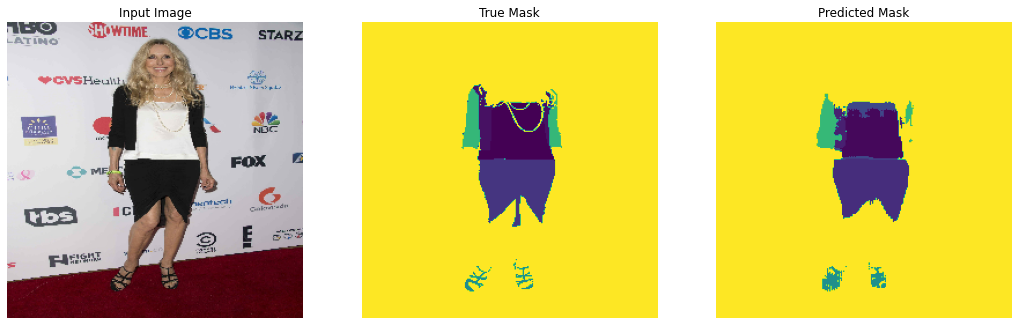

In [112]:
#tflite model predictions
for image,mask in sample:
    
    print(image.shape)
    interpreter.set_tensor(input_details[0]['index'],image)
    interpreter.invoke()
    tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
    print("Prediction results shape:", tflite_model_predictions.shape)
    prediction_classes = np.argmax(tflite_model_predictions,axis=-1)
    prediction_classes = prediction_classes[..., tf.newaxis]
    
    display_sample([image[0], mask[0], prediction_classes[0]])
    


9.Conclusions:

1. the model unet is not very good at predictions for such intricate images.

2. more robust models like mask rcnn can be used but due to hardware limitations it was not used in this case study.

3. input image to model can be resized to (512,512) instead of (256,256) but again due to memory limitations for this case study    images have been resized to (256,256).

    
    